Student Performance Predictor \\
Fall 2024 Data Science Project \\
Indra Pabba, 118989402 \\
Esha Shah, 118624099 \\
Amit Vankadhara, 118539225 \\
Ojas Jagtap, 118709123 \\
Ayush Sundararaman, 118906164 \\
Pratham Mathapati, 118648279  \\


**1. Contributions**:

Esha

*   Dataset Curation and Preprocessing: I found the dataset containing the absences and GPA, as well as the dataset containing the steps and GPA variables. This took a lot of time because there were not a lot of datasets that had more than 30 entries of this data, and a lot of other variables did not have a positive correlation to GPA.


*   Final Tutorial Report Creation: I was involved in creating the report, specifically the insights/conclusions part, exploratory data analysis part, and the plotting the visualization of the Expected GPA vs Average GPA.  








Ojas

*   Data Exploration and Summary Statistics: I conducted the inital data exploration to get a better undestanding of the data and relationships between features. As a result, we were able to narrow down our scope to focus on steps and absences as the most influential contributors to student performance.
*   ML Algorithm Training and Test Data Analysis: I merged the two dataframes on GPA to train a linear regression model based on both the steps and absences features. This involved splitting the dataframe into train and test subsets and fitting the model.

Amit



*   Visualization, Result Analysis, Conclusion: For the data I created the the two red and blue plots which were the steps vs gpa and the abscences vs gpa. This helped prove that there was a correlation between the feautures for the linear regression model.


*   ML Algorithm Design/Development: I explained the reasoning and came up with what machine learning technique to use. I also helped with using PlanetTerps api to get the expected GPA in a class.



Ayush

* ML Algorithm Design/Development: I used the Planet Terp API to find all the average GPAs for classes with a certain prefix. I found the expected GPA using our model and the data from PlanetTerp's API.

*  Visualization, Result Analysis, Conclusion: I wrote and printed out the code for all the expected grades that had that certain prefix and converted into a letter grade from a scale I made to make it easier for data interpretation. From this, I was able to help write the conclusion and make insights from the output.
   


Indra


*   Project Idea: I came up with the idea to make a GPA predictor, as I wanted to make something I could use myself. I had known that PlanetTerp had an API, so I suggested we could incorporate that into our project.
*   Final Tutorial Report Creation: I helped create the final tutorial report, specifically the introduction.

Pratham

*   Dataset Curation and Preprocessing: I was involved with the curating and preprocessing of datasets to make sure they could be analyzed properly by removing missing values, aand only included the features we need.
*   Final Tutorial Report Creation: I helped create the final tutorial report, specifically the data curation part.













**2. Introduction**

The topic of this data analysis is to understand the impact of absences and physical activity on academic performance. This research aims to investigate the relationship between attendance, physical activity, and academic performance. Through this analysis we want to answer:
*   Does the amount of absences impact GPA?
*   Does the amount of steps taken a day positively correlate with higher GPA?
*   Can we use these factors to predict a students GPA?
*   Which courses will UMD students succeed in? \\

As students at the University of Maryland, class registration is always a stressful time. We want to register for the classes we will do the best in and PlanetTerp guides us in these decisions. Thus, students using this app will be able to view their predicted letter grade for courses based on absences and daily steps. This can help promote healthier lifestyle changes and how they can improve their academics.

**3. Data Curation**

The datasets that we are using allow us to assess the correlation between student absences and physical activity (number of steps) on a student's GPA.

Our two datasets are downloaded from Kaggle:

- [Student_performance_data _.csv (Absences -> GPA)](https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset)
  - This includes detailed information on students’ demographic details, study habits, parental involvement, extracurricular activities, and academic performance. It provides many features that allow us to analyze the relationship between absences and GPA. This dataset will be useful as it categorizes students’ GPA into grade classes, making it easy to study trends and correlations. This will help us investigate whether fewer absences are consistently associated with higher GPA and better academic performance. Combined with the Step Count to GPA dataset, we will be able to show how physical activity and classroom engagement affect student success. This analysis will help us build a model that predicts how well a student will do in a specific UMD course based on based on attendance and physical activity.

- [FitbitsAndGradesData_Fall2017.csv (Number of Steps -> GPA)](https://www.kaggle.com/datasets/aleespinosa/fitbits-fieldtests-and-grades/data)
  - This dataset includes step counts tracked by Fitbit devices, providing a direct measure of physical activity. It allows us to examine how active students are on a daily basis and correlate this with their GPA. This dataset will be very useful as it allows us to analyze the role that physical activity plays in academic performance. Understanding the relationship between physical activity and GPA can provide valuable insights into how lifestyle choices influence academic outcomes. This will help us correlate student information, such as daily activity levels, with their GPA to predict how physical activity impacts academic success for UMD students.


 We then used Pandas to scrape the data and store it into Pandas dataframes so that we can use them for our analysis.

We will start by importing several relevant Python libraries for this study.

In [ ]:
#install planetterp
!pip install planetterp

# for importing our datasets
import kagglehub

# to use planetterp API
import planetterp

# standard python libraries
import os
import pandas as pd
import re
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
# Download the first dataset from Kaggle (Absences to GPA)
dir = kagglehub.dataset_download("rabieelkharoua/students-performance-dataset")
path = os.path.join(dir, 'Student_performance_data _.csv')
performance_df = pd.read_csv(path)

performance_df.head()

100%|██████████| 66.2k/66.2k [00:00<00:00, 48.5MB/s]

Extracting files...


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [ ]:
# Download the second dataset from Kaggle (Number of Steps -> GPA)
dir = kagglehub.dataset_download("aleespinosa/fitbits-fieldtests-and-grades")
path = os.path.join(dir, 'FitbitsAndGradesData_Fall2017.csv')
steps_df = pd.read_csv(path)

steps_df.head()


100%|██████████| 11.2k/11.2k [00:00<00:00, 16.5MB/s]

Extracting files...


,Key,Steps,Peak,Cardio,FatBurn,Mode,Minutes,Gender,Age,GPA,Life Score
0,1,11157,0.13,3.86,111.92,1,9.35,1,23,4.00,48
1,2,7986,2.72,15.53,249.29,1,8.20,1,18,3.26,101
2,3,11602,0.35,2.10,195.32,0,12.73,0,18,3.07,64
3,4,10609,1.00,6.51,121.75,1,10.00,1,17,4.00,41
4,5,14552,9.10,6.09,109.66,1,8.63,0,18,2.87,83


We will then clean the data. The only two variables we need for the first dataset are absences and GPA. The only two variables we need for the second dataset are steps and GPA. We also need to make sure there is no invalid data, as this could skew our results. Additionally, we need to check if any rows have missing data.

In [ ]:
# Selecting only the relevant columns 'Absences' and 'GPA' from the performance_df DataFrame
performance_df = performance_df.loc[:, ['Absences', 'GPA']]

# Removing rows that have invalid GPAs
performance_df = performance_df[(performance_df['GPA'] >= 0.0) & (performance_df['GPA'] <= 4.0)]

# Removes rows with missing data
performance_df.dropna(inplace=True)

performance_df.head()

,Absences,GPA
0,7,2.929196
1,0,3.042915
2,26,0.112602
3,14,2.054218
4,17,1.288061


In [ ]:
# Selecting only the relevant columns 'Steps' and 'GPA' from the steps_df DataFrame
steps_df = steps_df.loc[:, ['Steps', 'GPA']]

# Removing rows that have invalid GPAs
steps_df = steps_df[(steps_df['GPA'] >= 0.0) & (steps_df['GPA'] <= 4.0)]

# Removes rows with missing data
steps_df.dropna(inplace=True)

steps_df.head()

,Steps,GPA
0,11157,4.00
1,7986,3.26
2,11602,3.07
3,10609,4.00
4,14552,2.87


Now, our data is ready for analysis.

**4. Exploratory data analysis**

We will first examine the relationship between Absences and GPA.

In [ ]:
#pearson correlation coefficient

x1 = performance_df['Absences']
y1 = performance_df['GPA']

correlation_coef, p_value = pearsonr(x1, y1)

print("Correlation coefficient:", correlation_coef)
print("P-value:", p_value)

Correlation coefficient: -0.9193135764208643
P-value: 0.0


 The pearson correlation coeffiecient was -0.9193135764208643 which indicates that there is a very strong negative correlation. This shows that more absences are linked to lower GPAs. This method also tells us the p-value. Our  $H_0$  is that the number of absences has no effect on the average GPA. Our $H_A$  is that the number of absences leads to a decrease on the average GPA. We were able to get a p-value of 0.0. Our significance level was 0.05. Because it was less than the significance level, we were able to reject the null hypothesis and determine that the the number of absences does lead to a decrease in the average GPA

In [ ]:
#one tailed z test
group_low_absences = performance_df[performance_df['Absences'] <= performance_df['Absences'].median()]['GPA']
group_high_absences = performance_df[performance_df['Absences'] > performance_df['Absences'].median()]['GPA']

t_stat, p_value_two_tailed = ttest_ind(group_low_absences, group_high_absences, alternative='less')

x1 = performance_df['Absences']
y1 = performance_df['GPA']

mean_x1 = np.mean(x1)
mean_y1 = np.mean(y1)

std_x1 = np.std(x1)
std_y1 = np.std(y1)

n_x1 = len(x1)
n_y1 = len(y1)

z_score = (mean_x1 - mean_y1) / np.sqrt((std_x1**2 / n_x1) + (std_y1**2 / n_y1))

x = 1 - stats.norm.cdf(abs(z_score))

print("Z score: ", z_score)
print("One-tailed P-value:", x)

Z score:  72.57394868597247
One-tailed P-value: 0.0


From the one tailed z-test, we were able to conclude that the p-value was 0.0, which tells us that the average GPA's of people with less absences are significantly different than the average GPA's of people with more absences.

Text(0, 0.5, 'GPA')

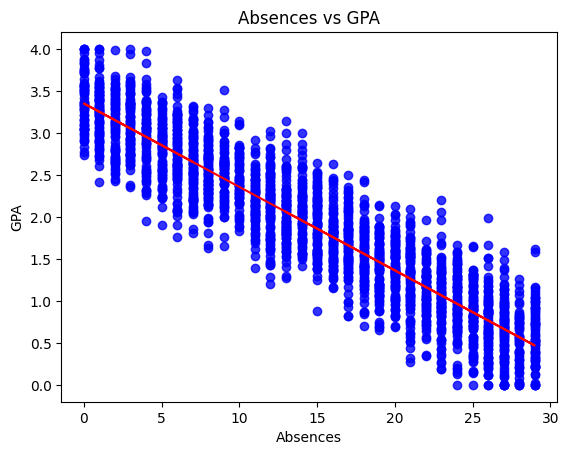

In [ ]:
# Plot

plt.scatter(performance_df['Absences'], performance_df['GPA'], color='b', alpha = 0.8)

slope, intercept = np.polyfit(x1, y1, 1)

plt.plot(x1, slope * x1 + intercept, color='r', label='Best Fit Line')
plt.title('Absences vs GPA')
plt.xlabel('Absences')
plt.ylabel('GPA')

Our plot also shows the negative correlation relationship between Absences and GPA. Thus, more absences are linked to lower GPAs

We will now examine the relationship between Steps and GPA.

In [ ]:
x2 = steps_df['Steps']
y2 = steps_df['GPA']

correlation_coef, p_value = pearsonr(x2, y2)

print("Correlation coefficient:", correlation_coef)
print("P-value:", p_value)

Correlation coefficient: 0.4110257926945191
P-value: 4.32695456324417e-25


The pearson correlation coeffiecient was 0.4110257926945191 which indicates that there is a moderate positive correlation. This shows that more steps taken in a day are linked to higher GPAs. Our $H_0$ is that the number of steps taken in a day has no effect on the average GPA. Our $H_A$ is that the number of steps taken in a day leads to an increase on the average GPA. We were able to get a p-value of 4.32695456324417e-25. Our significance level was 0.05. Because it was less than the significance level, we were able to reject the null hypothesis and determine that the the number of steps does lead to an increase in the average GPA.

In [ ]:
group_low_steps = steps_df[steps_df['Steps'] <= steps_df['Steps'].median()]['GPA']
group_high_steps = steps_df[steps_df['Steps'] > steps_df['Steps'].median()]['GPA']

_, pvalue = ttest_ind(group_low_steps, group_high_steps)

print("P-value:", pvalue)

P-value: 2.7105050176464292e-15


From the two tailed t test, we were able to conclude that the p-value was 2.7105050176464292e-15, which tells us that the average GPA's of people with more steps are significantly different than the average GPA's of people with less steps.

Text(0, 0.5, 'GPA')

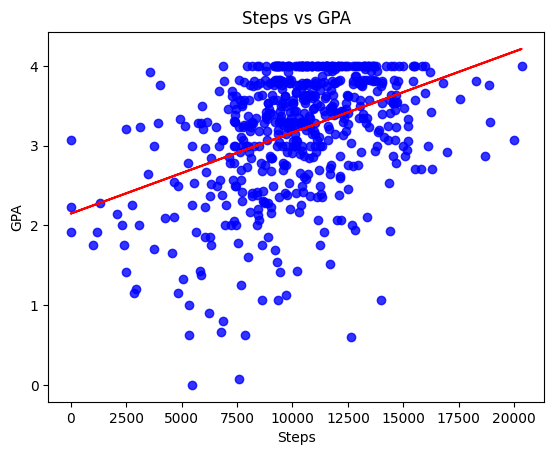

In [ ]:
plt.scatter(steps_df['Steps'], steps_df['GPA'], color='b', alpha = 0.8)

slope, intercept = np.polyfit(x2, y2, 1)

plt.plot(x2, slope * x2 + intercept, color='r')
plt.title('Steps vs GPA')
plt.xlabel('Steps')
plt.ylabel('GPA')

Our plot also shows the postive correlation relationship between Steps and GPA. Thus, more steps are linked to higher GPAs.

**5. Primary Analysis**

The machine learning technique we will use is multiple linear regression. We decided to use this technique because it predicts a continous outcome. Additionally, it understands the relationship between the features and the target variables. In our model, steps and absences are the features, while GPA is the target variable. Our goal in using machine learning is to predict the GPA related to the features of steps and absences in our dataset.


In this first block of code, users can input the amount of steps they take each day and their expected number of absences for the class. Based on this data, our model will predict their average GPA.

In [ ]:
# Merge datasets on GPA (assumes each GPA is unique or nearly unique in both datasets)
combined_df = pd.merge(steps_df, performance_df, on='GPA', how='inner')

# Handle duplicates or mismatches, if any
combined_df.drop_duplicates(inplace=True)

# Features and Target Variable
X = combined_df[['Steps', 'Absences']]
y = combined_df['GPA']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Prediction Function
def predict_gpa(steps, absences):
    return model.predict([[steps, absences]])[0]

# Example Usage
example_steps = 10000  # Replace with student's steps
example_absences = 5   # Replace with student's absences
predicted_gpa = predict_gpa(example_steps, example_absences)
print(f"Predicted GPA: {predicted_gpa:.2f}")

Mean Squared Error: 0.0270
Predicted GPA: 3.45


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Our mean squared error (MSE) was 0.0270. This is a good MSE for a small-scale target variable like GPA. Thus, our model is only making small errors, so we know it is performing well.

In this third block of code, users can input their average daily steps, their expected number of absences, and the course prefix they are interested in. Based on this data, our model will output all courses with that prefix and the users' expected grade letter for that course. We do this by querying PlanetTerp's API for a particular course prefix. Then we average the user's predicted GPA with each course's GPA average. This represents the projected letter grade for our user given the difficulty of each course. Now, students will be able to see how well they can do in a certain course at UMD based on their daily steps and absences.  

In [ ]:
# Function to map letter grades to GPA points
def grade_to_points(grade):
    grade_points = {
        'A+': 4.0,
        'A': 4.0,
        'A-': 3.7,
        'B+': 3.3,
        'B': 3.0,
        'B-': 2.7,
        'C+': 2.3,
        'C': 2.0,
        'C-': 1.7,
        'D+': 1.3,
        'D': 1.0,
        'D-': 0.7,
        'F': 0.0,
        # Include other grades if necessary
    }
    return grade_points.get(grade, 0.0)

# Function to map GPA points to letter grades
def points_to_grade(gpa):
    if gpa >= 3.85:
        return 'A'
    elif gpa >= 3.70:
        return 'A-'
    elif gpa >= 3.30:
        return 'B+'
    elif gpa >= 3.00:
        return 'B'
    elif gpa >= 2.70:
        return 'B-'
    elif gpa >= 2.30:
        return 'C+'
    elif gpa >= 2.00:
        return 'C'
    elif gpa >= 1.70:
        return 'C-'
    elif gpa >= 1.30:
        return 'D+'
    elif gpa >= 1.00:
        return 'D'
    elif gpa >= 0.70:
        return 'D-'
    else:
        return 'F'

# Function to get all courses with the specified prefix
def get_courses_with_prefix(prefix):
    # Extract department and course number prefix using regex
    match = re.match(r'^([A-Z]+)(\d+)$', prefix)
    if not match:
        print("Invalid course prefix format.")
        return []

    department = match.group(1)
    course_number_prefix = match.group(2)

    url = 'https://api.planetterp.com/v1/courses'
    params = {'department': department, 'per_page': 1000}
    response = requests.get(url, params=params)
    courses = response.json()

    # Filter courses where 'name' starts with the full prefix
    filtered_courses = []
    for course in courses:
        if 'name' in course and course['name'].startswith(prefix):
            filtered_courses.append(course)
    return filtered_courses

# Function to calculate the average GPA for a course
def get_average_gpa(course_name):
    url = 'https://api.planetterp.com/v1/grades'
    params = {'course': course_name}
    response = requests.get(url, params=params)
    grades = response.json()
    total_grade_points = 0
    total_credits = 0
    for grade_entry in grades:
        # Sum over all possible grades
        for grade in ['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F']:
            count = grade_entry.get(grade, 0)
            grade_point = grade_to_points(grade)
            total_grade_points += grade_point * count
            total_credits += count
    if total_credits > 0:
        average_gpa = total_grade_points / total_credits
        return average_gpa
    else:
        return None

# Function to compute the expected grade for the student
def compute_expected_grade(predicted_gpa, average_gpa):
    return (predicted_gpa + average_gpa) / 2

# Function to train the regression model (once)
def train_regression_model():

    # Merge datasets on 'GPA'
    combined_df = pd.merge(steps_df, performance_df, on='GPA', how='inner')

    # Features and Target Variable
    X = combined_df[['Steps', 'Absences']]
    y = combined_df['GPA']

    # Train Regression Model
    model = LinearRegression()
    model.fit(X, y)

    return model

# Main function
def main():
    # Input: Steps, Absences, and Course Prefix
    steps_input = input("Enter your average daily steps (e.g., '10000'): ").strip()
    absences_input = input("Enter your number of absences (e.g., '3'): ").strip()
    prefix = input("Enter course prefix (e.g., 'CMSC4', 'MATH4'): ").strip().upper()

    try:
        steps = float(steps_input)
        absences = float(absences_input)
    except ValueError:
        print("Invalid input for steps or absences. Please enter numeric values.")
        return

    # Train or load the regression model
    model = train_regression_model()

    # Predict GPA using the regression model
    predicted_gpa = model.predict([[steps, absences]])[0]

    # Get courses with the specified prefix
    courses = get_courses_with_prefix(prefix)

    if not courses:
        print(f"No courses found with prefix '{prefix}'.")
        return

    print(f"\nPredicted GPA based on your steps and absences: {predicted_gpa:.2f}")
    predicted_letter_grade = points_to_grade(predicted_gpa)
    print(f"Predicted overall grade: {predicted_letter_grade}\n")

    print(f"Projected grades for courses starting with '{prefix}':\n")
    for course in courses:
        course_name = course['name']
        average_gpa = get_average_gpa(course_name)
        if average_gpa is not None:
            expected_gpa = compute_expected_grade(predicted_gpa, average_gpa)
            expected_letter_grade = points_to_grade(expected_gpa)
            print(f"Course: {course_name} - {course.get('title', '')}")
            print(f"  Average GPA for course: {average_gpa:.2f}")
            print(f"  Your expected grade: {expected_letter_grade}\n")
        else:
            print(f"Course: {course_name}")
            print("  Average GPA for course: N/A")
            print("  Your expected grade: N/A\n")

if __name__ == '__main__':
    main()

Enter your average daily steps (e.g., '10000'): 2000
Enter your number of absences (e.g., '3'): 10
Enter course prefix (e.g., 'CMSC4', 'MATH4'): CMSC3


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



Predicted GPA based on your steps and absences: 2.62
Predicted overall grade: C+

Projected grades for courses starting with 'CMSC3':

Course: CMSC330 - Organization of Programming Languages
  Average GPA for course: 2.95
  Your expected grade: B-

Course: CMSC351 - Algorithms
  Average GPA for course: 2.63
  Your expected grade: C+

Course: CMSC396H - Computer Science Honors Seminar
  Average GPA for course: 4.00
  Your expected grade: B+

Course: CMSC389B - Special Topics in Computer Science; A Tour of Programming Languages
  Average GPA for course: 3.77
  Your expected grade: B

Course: CMSC389J - Special Topics in Computer Science; Introduction to Reverse Engineering
  Average GPA for course: 3.52
  Your expected grade: B

Course: CMSC389P - Special Topics in Computer Science; Mastering the PM Interview
  Average GPA for course: 3.85
  Your expected grade: B

Course: CMSC389T - Special Topics in Computer Science; Introduction to Git, Github and Project Management
  Average GPA for

**6. Visualizations**

Enter your average daily steps (e.g., '10000'): 2000
Enter your number of absences (e.g., '3'): 10
Enter course prefix (e.g., 'CMSC4', 'MATH4'): CMSC3


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



Predicted GPA based on your steps and absences: 2.62
Predicted overall grade: C+

Projected grades for courses starting with 'CMSC3':



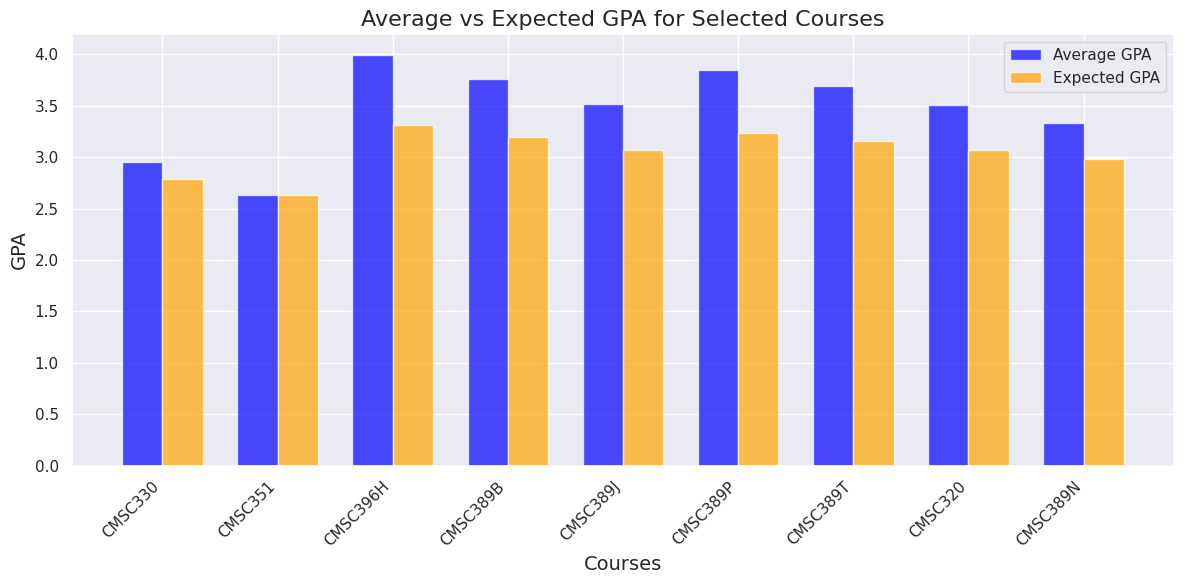

In [ ]:
def visualize_grades(course_data):
    course_names = [data['name'] for data in course_data]
    average_gpas = [data['average_gpa'] for data in course_data]
    expected_gpas = [data['expected_gpa'] for data in course_data]

    x = range(len(course_names))

    plt.figure(figsize=(12, 6))
    bar_width = 0.35

    # Bar plot for average GPAs
    plt.bar(x, average_gpas, width=bar_width, label='Average GPA', color='blue', alpha=0.7)

    # Bar plot for expected GPAs
    plt.bar([p + bar_width for p in x], expected_gpas, width=bar_width, label='Expected GPA', color='orange', alpha=0.7)

    # Adding labels and title
    plt.xlabel('Courses', fontsize=14)
    plt.ylabel('GPA', fontsize=14)
    plt.title('Average vs Expected GPA for Selected Courses', fontsize=16)
    plt.xticks([p + bar_width / 2 for p in x], course_names, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()

    # Show the plot
    plt.show()
def main():
    # Input: Steps, Absences, and Course Prefix
    steps_input = input("Enter your average daily steps (e.g., '10000'): ").strip()
    absences_input = input("Enter your number of absences (e.g., '3'): ").strip()
    prefix = input("Enter course prefix (e.g., 'CMSC4', 'MATH4'): ").strip().upper()

    try:
        steps = float(steps_input)
        absences = float(absences_input)
    except ValueError:
        print("Invalid input for steps or absences. Please enter numeric values.")
        return

    # Train or load the regression model
    model = train_regression_model()

    # Predict GPA using the regression model
    predicted_gpa = model.predict([[steps, absences]])[0]

    # Get courses with the specified prefix
    courses = get_courses_with_prefix(prefix)

    if not courses:
        print(f"No courses found with prefix '{prefix}'.")
        return

    print(f"\nPredicted GPA based on your steps and absences: {predicted_gpa:.2f}")
    predicted_letter_grade = points_to_grade(predicted_gpa)
    print(f"Predicted overall grade: {predicted_letter_grade}\n")
    course_data = []

    print(f"Projected grades for courses starting with '{prefix}':\n")
    for course in courses:
        course_name = course['name']
        average_gpa = get_average_gpa(course_name)
        if average_gpa is not None:
            expected_gpa = compute_expected_grade(predicted_gpa, average_gpa)
            expected_letter_grade = points_to_grade(expected_gpa)

            course_data.append({'name': course_name, 'average_gpa': average_gpa, 'expected_gpa': expected_gpa})
        else:
          continue

    if course_data:
        visualize_grades(course_data)

if __name__ == '__main__':
    main()


This plot shows the comparison between the student's expected GPA vs the average GPA of that class. This visualization can help students decide whether or not they will succeed in the class prior to registration. The bar plot explicity shows where the students stand compared to the other students.

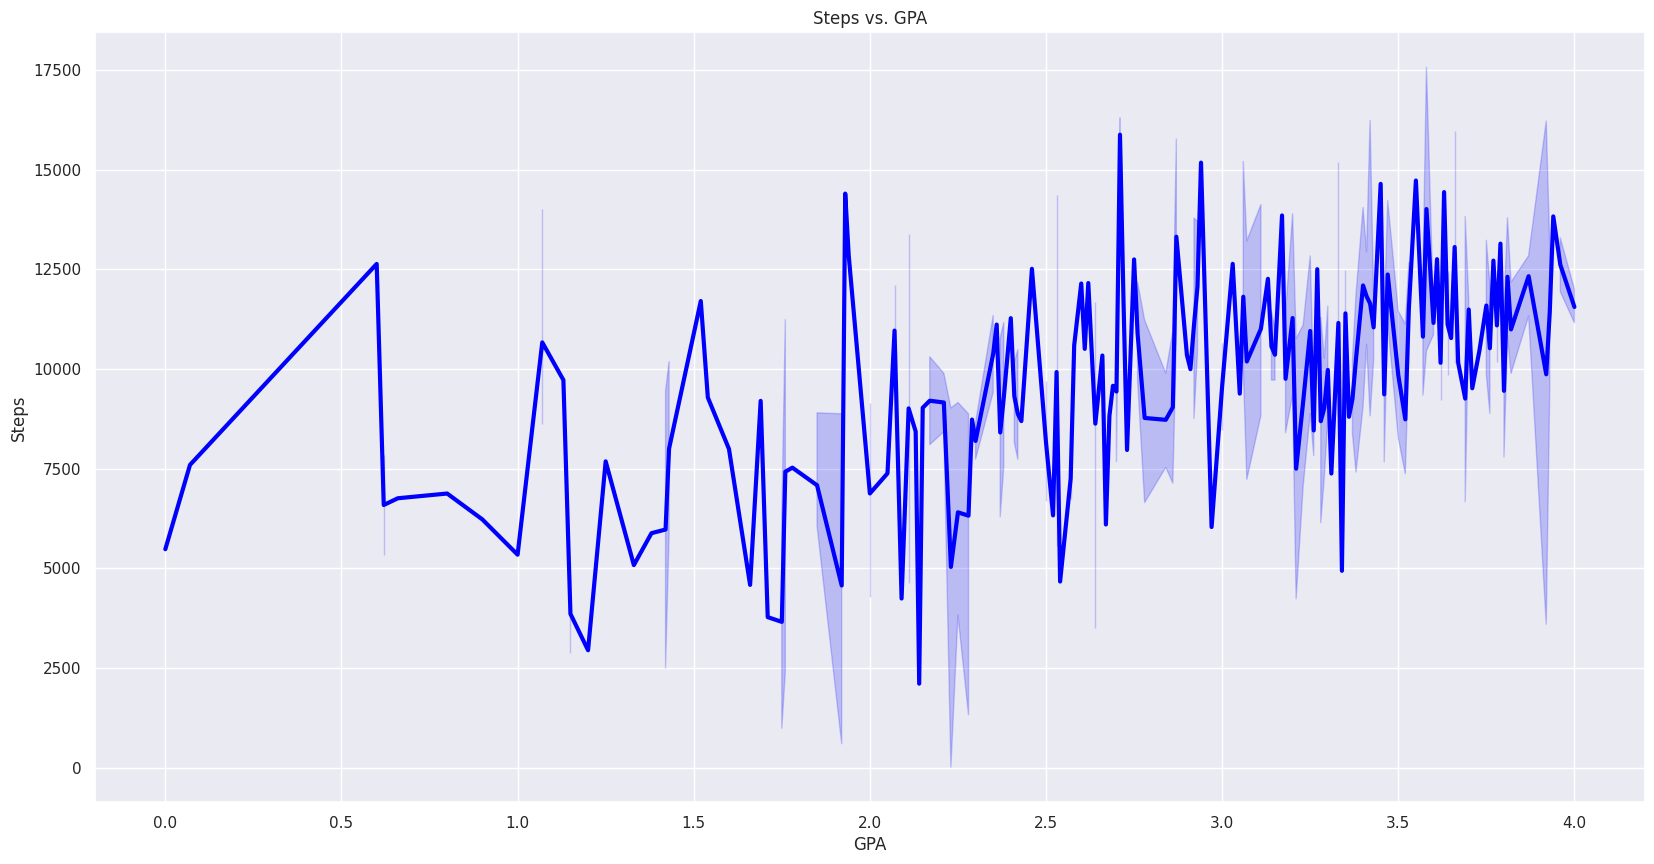

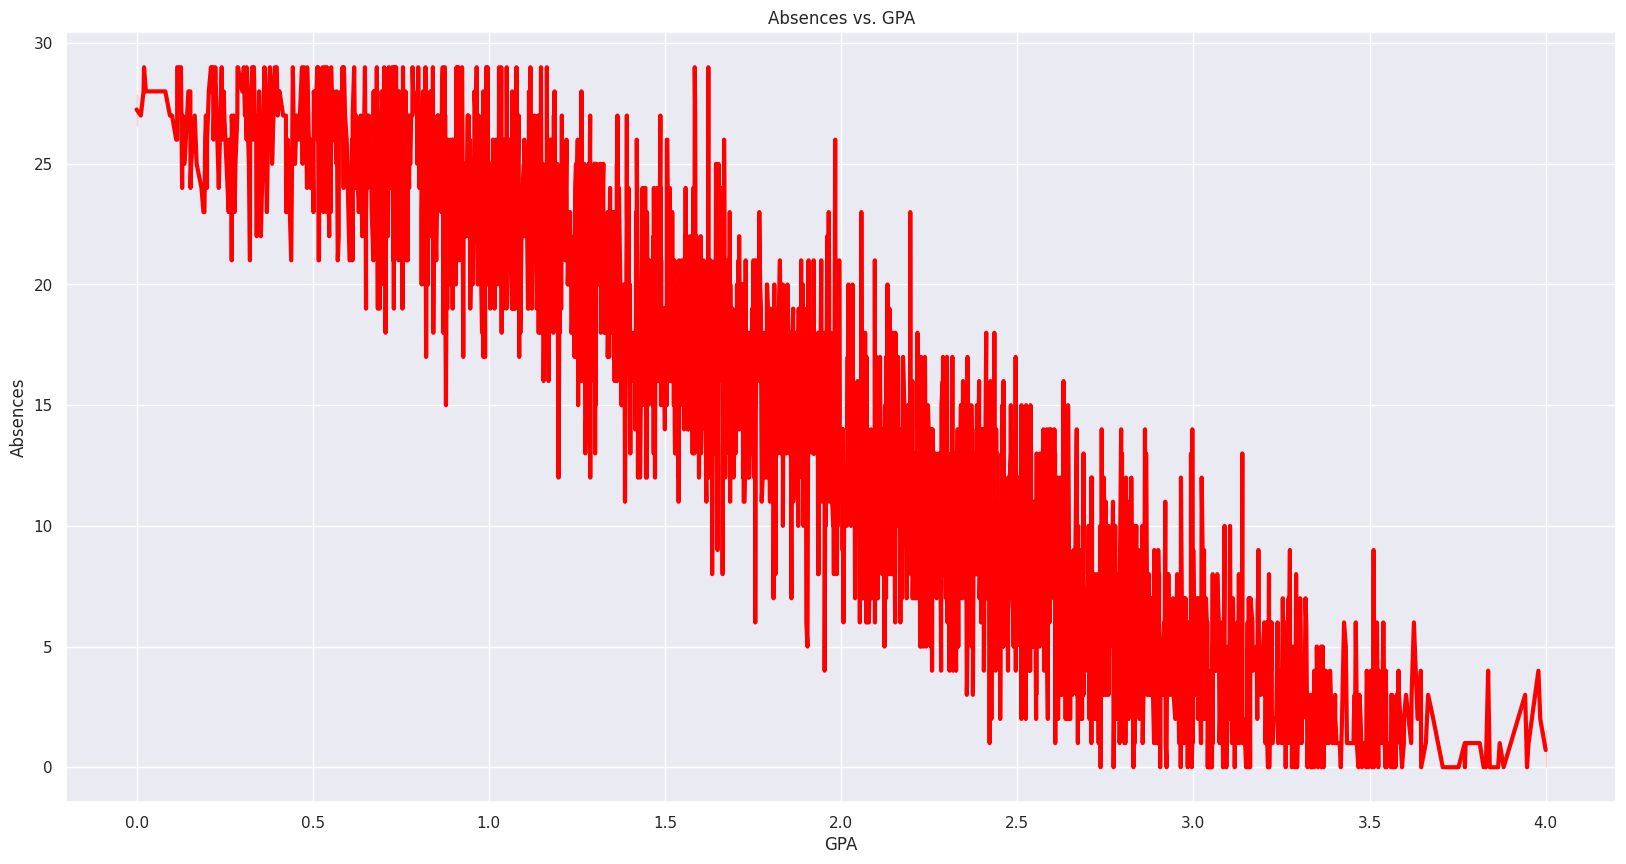

In [ ]:
# Setting style and figure size
sns.set(font_scale=2.0)
sns.set(rc={'figure.figsize': (20, 10)})

# Plot 1: Steps vs. GPA
plt.figure(figsize=(20, 10))
plt.title("Steps vs. GPA")
# sns.scatterplot(data=steps_df, x="GPA", y="Steps", color="blue", alpha=0.2, s=100)  # Scatter points in the background
sns.lineplot(data=steps_df, x="GPA", y="Steps", color="blue", linewidth=3)         # Zig-zaggy line in the foreground
plt.xlabel("GPA")
plt.ylabel("Steps")
plt.show()

# Plot 2: Absences vs. GPA
plt.figure(figsize=(20, 10))
plt.title("Absences vs. GPA")
# sns.scatterplot(data=performance_df, x="GPA", y="Absences", color="red", alpha=0.2, s=100)  # Scatter points in the background
sns.lineplot(data=performance_df, x="GPA", y="Absences", color="red", linewidth=3)          # Zig-zaggy line in the foreground
plt.xlabel("GPA")
plt.ylabel("Absences")
plt.show()


The Steps vs GPA plot shows the general positive trend between more steps and a higher GPA. The Absences vs GPA plot shows the overall negative correlation between the two variables. Thus, it emphasizes that the more absences there are, the lower the GPA.

**7. Insights and Conclusions**

Based on our findings, we were able to answer our initial questions.
*   Does the amount of absences impact GPA? Yes, more absences are linked to lower GPAs
*   Does the amount of steps taken a day positively correlate with higher GPA? Yes, the more steps taken correlates to a higher GPA.
*   Can we use these factors to predict a students GPA? Yes, we can use these factors to predict a students GPA.
*   Which courses will UMD students succeed in? Yes, as we can predict their expected letter grade for each course.

Although we know absences and physical activity are not the only two factors that determine GPA, our model demonstrates that they still play a significant role. This helps to show that having a healthy lifestyle and going to class leads to better performance in the course.

Our study is simple in the sense it only focus on two factos that lead to a high GPA. There are other factors such as sleep, study time, IQ, etc. Those in the education field can get a more in depth understanding of this. It is also important that these factors can change in the future. For example, the use of AI is only a newer factor.

Thus, through our model we were able to find that absences and daily steps have a influence on one's GPA. With this correlation, we are able to predict students' expected letter grade in UMD courses using PlanetTerp's API. This can help students to choose courses they can excel in with their current habits. It also motivate students to have a healthier lifestyle and go to class more to potentially improve their grade.